In [1]:
#import library
import pandas as pd
pd.options.display.max_columns=50

In [2]:
#import dataset
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

In [3]:
#Tampilkan jumlah baris dan kolom
print(df_load.shape)

(7113, 22)


In [4]:
#Tampilkan 5 data teratas
df_load.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#Jumlah ID yang unik
df_load.customerID.nunique()

7017

Memfilter ID Number Pelanggan Format Tertentu

In [6]:
#menghitung banyaknya rows Customer ID
df_load.customerID.count()

7113

In [7]:
#kriteria
#1. Panjang karakter adalah 11-12.
#2. Terdiri dari angka Saja, tidak diperbolehkan ada karakter selain angka
#3. Diawali dengan angka 45 2 digit pertama.

df_load['valid_id']=df_load['customerID'].astype('str').str.match('^(45)[0-9]{9,10}$')

In [8]:
df_load=(df_load[df_load['valid_id']==True]).drop('valid_id',axis=1)

In [9]:
print('Hasil jumlah ID Customer yang terfilter adalah',df_load.customerID.count())

Hasil jumlah ID Customer yang terfilter adalah 7006


Memfilter Duplikasi ID Number Pelanggan

In [10]:
# Drop Duplicate Rows
df_load=df_load.drop_duplicates()
df_load.shape

(6999, 22)

In [11]:
# Drop duplicate ID sorted by Periode
df_load=df_load.drop_duplicates(subset=['customerID']).sort_values(by='UpdatedAt',ascending=False)

In [12]:
print('Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah',df_load['customerID'].count())

Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah 6993


Mengatasi Missing Values dengan Penghapusan Rows

In [13]:
print('Total missing values data dari kolom Churn',df_load['Churn'].isnull().sum())

Total missing values data dari kolom Churn 43


In [14]:
# Dropping all Rows with spesific column (churn)
df_load.dropna(subset=['Churn'],inplace=True)
print('Total Rows dan kolom Data setelah dihapus data Missing Values adalah',df_load.shape)


Total Rows dan kolom Data setelah dihapus data Missing Values adalah (6950, 22)


Mengatasi Missing Values dengan Pengisian Nilai tertentu

In [15]:
df_load.isnull().sum().sort_values(ascending=False)

tenure              99
MonthlyCharges      26
TotalCharges        15
UpdatedAt            0
DeviceProtection     0
PaymentMethod        0
PaperlessBilling     0
Contract             0
StreamingMovies      0
StreamingTV          0
TechSupport          0
OnlineBackup         0
customerID           0
OnlineSecurity       0
InternetService      0
MultipleLines        0
PhoneService         0
Dependents           0
Partner              0
SeniorCitizen        0
gender               0
Churn                0
dtype: int64

In [16]:
# handling missing values Tenure fill with 11
df_load['tenure'].fillna(11, inplace=True)

# Handling missing values num vars (except Tenure)
for col_name in list(['MonthlyCharges','TotalCharges']):
    median = df_load[col_name].median()
    df_load[col_name].fillna(median, inplace=True)
    
print('\nJumlah Missing Values setelah di imputer datanya, adalah:')
print(df_load.isnull().sum().sort_values(ascending=False))


Jumlah Missing Values setelah di imputer datanya, adalah:
UpdatedAt           0
customerID          0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
DeviceProtection    0
OnlineBackup        0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Dependents          0
Partner             0
SeniorCitizen       0
gender              0
Churn               0
dtype: int64


Mendeteksi adanya Outlier (Boxplot)

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df_load.describe()

,UpdatedAt,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,6950.0,6950.000000,6950.000000,6950.000000,6950.000000
mean,202006.0,0.162302,32.477266,65.783741,2305.083460
std,0.0,0.368754,25.188910,50.457871,2578.651143
min,202006.0,0.000000,0.000000,0.000000,19.000000
25%,202006.0,0.000000,9.000000,36.462500,406.975000
50%,202006.0,0.000000,29.000000,70.450000,1400.850000
75%,202006.0,0.000000,55.000000,89.850000,3799.837500
max,202006.0,1.000000,500.000000,2311.000000,80000.000000


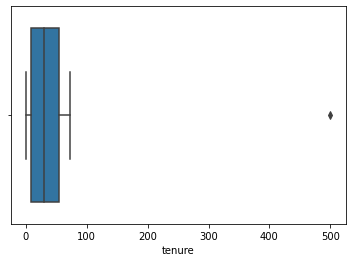

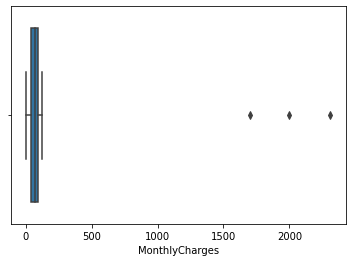

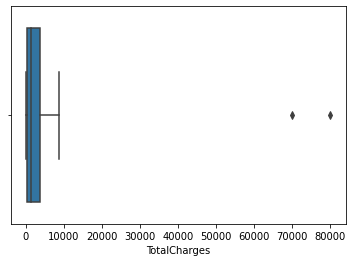

In [19]:
plt.figure()
sns.boxplot(x=df_load['tenure'])
plt.show()

plt.figure()
sns.boxplot(x=df_load['MonthlyCharges'])
plt.show()

plt.figure()
sns.boxplot(x=df_load['TotalCharges'])
plt.show()

Mengatasi Outlier

In [20]:
Q1=df_load[['tenure','MonthlyCharges','TotalCharges']].quantile(0.25)
Q3=df_load[['tenure','MonthlyCharges','TotalCharges']].quantile(0.75)
IQR=Q3-Q1

In [21]:
maximum=Q3+1.5*IQR
minimum=Q1+1.5*IQR

In [22]:
print('Nilai Maximum dari masing-masing Variable adalah:')
print(maximum)

Nilai Maximum dari masing-masing Variable adalah:
tenure             124.00000
MonthlyCharges     169.93125
TotalCharges      8889.13125
dtype: float64


In [23]:
print('Nilai Maximum dari masing-masing Variable adalah:')
print(minimum)

Nilai Maximum dari masing-masing Variable adalah:
tenure              78.00000
MonthlyCharges     116.54375
TotalCharges      5496.26875
dtype: float64


In [25]:
more_than=df_load>maximum
lower_than=df_load<minimum

<ipython-input-25-348854c89f08>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  more_than=df_load>maximum
<ipython-input-25-348854c89f08>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  lower_than=df_load<minimum


In [26]:
df_load=df_load.mask(more_than,other=maximum,axis=1)
df_load=df_load.mask(lower_than,other=minimum,axis=1)

In [27]:
print('Persebaran data setelah ditangani Outliersnya:')
print(df_load[['tenure','MonthlyCharges','TotalCharges']].describe())

Persebaran data setelah ditangani Outliersnya:
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     78.006619      116.568674   5657.372147
std       0.551779        1.110064    510.191559
min      78.000000      116.543750   5496.268750
25%      78.000000      116.543750   5496.268750
50%      78.000000      116.543750   5496.268750
75%      78.000000      116.543750   5496.268750
max     124.000000      169.931250   8889.131250


**Menstandarisasi Nilai**

Mendeteksi Nilai yang tidak Standar

In [29]:
for col_name in list(df_load.columns):

['UpdatedAt',
 'customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [32]:
#Loop
for col_name in list(['gender','SeniorCitizen','Partner','Dependents','PhoneService',
					  'MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
					  'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']):
	print('\nUnique Values Count \033[1m'+'Before Standardized \033[0mVariable', col_name)
	print(df_load[col_name].value_counts())


Unique Values Count Before Standardized Variable gender
Male         3499
Female       3431
Wanita         14
Laki-Laki       6
Name: gender, dtype: int64

Unique Values Count Before Standardized Variable SeniorCitizen
0    5822
1    1128
Name: SeniorCitizen, dtype: int64

Unique Values Count Before Standardized Variable Partner
No     3591
Yes    3359
Name: Partner, dtype: int64

Unique Values Count Before Standardized Variable Dependents
No     4870
Yes    2060
Iya      20
Name: Dependents, dtype: int64

Unique Values Count Before Standardized Variable PhoneService
Yes    6281
No      669
Name: PhoneService, dtype: int64

Unique Values Count Before Standardized Variable MultipleLines
No                  3346
Yes                 2935
No phone service     669
Name: MultipleLines, dtype: int64

Unique Values Count Before Standardized Variable InternetService
Fiber optic    3057
DSL            2388
No             1505
Name: InternetService, dtype: int64

Unique Values Count Before Stand

Menstandarisasi Variable Kategorik

In [40]:
df_load = df_load.replace(['Laki-Laki', 'Wanita', 'Iya', 'Churn'],
                          ['Male', 'Female', 'Yes', 'Yes'])


In [41]:
#Loop
for col_name in list(['gender','Dependents','Churn']):
	print('\nUnique Values Count \033[1m'+'After Standardized \033[0mVariable', col_name)
	print(df_load[col_name].value_counts())


Unique Values Count After Standardized Variable gender
Male      3505
Female    3445
Name: gender, dtype: int64

Unique Values Count After Standardized Variable Dependents
No     4870
Yes    2080
Name: Dependents, dtype: int64

Unique Values Count After Standardized Variable Churn
No     5114
Yes    1836
Name: Churn, dtype: int64
